<a href="https://colab.research.google.com/github/xin1118/Image-Generation-awesome/blob/main/01_TDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TDA分析**
TDA是一种能够从复杂数据中提取形状特征的方法。

In [ ]:
import numpy as np
import gudhi as gd
import gudhi.representations

from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy import ndimage
import json

%matplotlib inline

In [ ]:
image = io.imread( "/content/01.jpg" )
grayscale_image = rgb2gray(image)

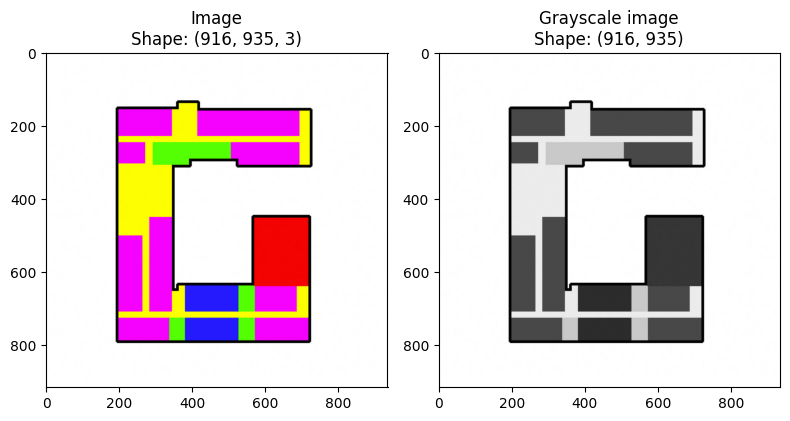

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 40))

axes[0].imshow(image)
axes[0].set_title(f'Image\nShape: {image.shape}')

axes[1].imshow(grayscale_image, cmap='gray')
axes[1].set_title(f'Grayscale image\nShape: {grayscale_image.shape}')


plt.tight_layout()
plt.show()

In [ ]:
flat_grayscale_image = grayscale_image.flatten()
print(flat_grayscale_image.shape)

(856460,)


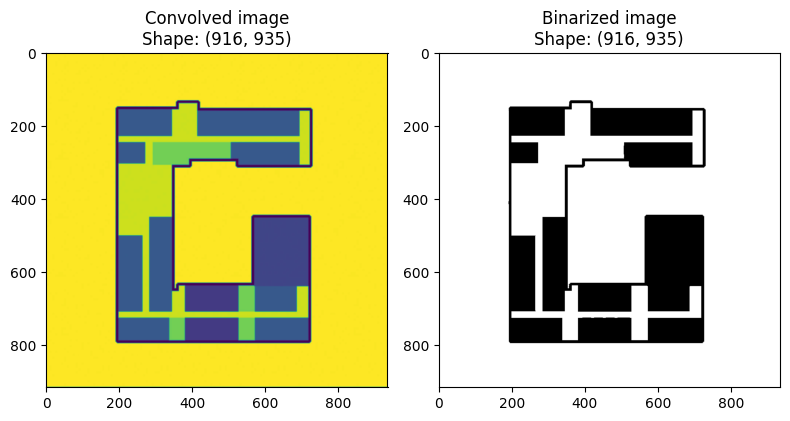

In [ ]:
convolve = np.array([[1,1,1],[1,1,1],[1,1,1]])

convolved_image = ndimage.convolve(grayscale_image, convolve, mode='constant', cval=0.0)
convolved_image = convolved_image/9

treshold = 0.5
binarized_image = grayscale_image > treshold

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 40))

axes[0].imshow(convolved_image)
axes[0].set_title(f'Convolved image\nShape: {convolved_image.shape}')

axes[1].imshow(binarized_image, cmap='gray')
axes[1].set_title(f'Binarized image\nShape: {binarized_image.shape}')


plt.tight_layout()
plt.show()

In [ ]:
cc = gd.CubicalComplex(dimensions = grayscale_image.shape, top_dimensional_cells = flat_grayscale_image)

In [ ]:
print("Type:", type(cc), "- Dimension:", cc.dimension(), "- Num simplices:", cc.num_simplices())

Type: <class 'gudhi.cubical_complex.CubicalComplex'> - Dimension: 2 - Num simplices: 3429543


In [ ]:
persistence = cc.persistence()

/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


Text(0.5, 1.0, 'Persistence diagram of the Cubical complex')

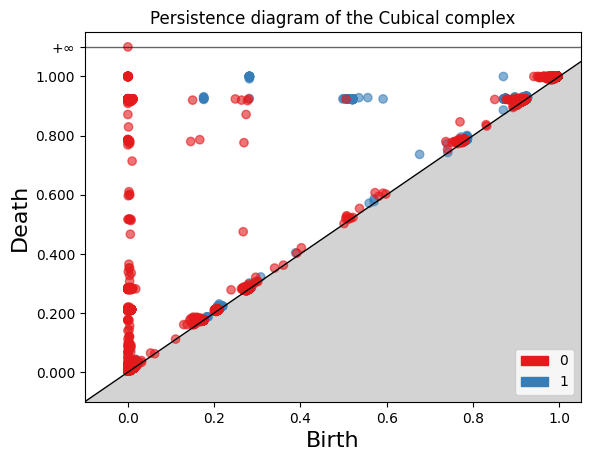

In [ ]:
# Persistence diagram
gd.plot_persistence_diagram(persistence)
plt.title('Persistence diagram of the Cubical complex')

In [ ]:
persistence_0 = cc.persistence_intervals_in_dimension(0)  #intervals de persistencia de dimensio 0
persistence_1 = cc.persistence_intervals_in_dimension(1)  #intervals de persistencia de dimensio 1

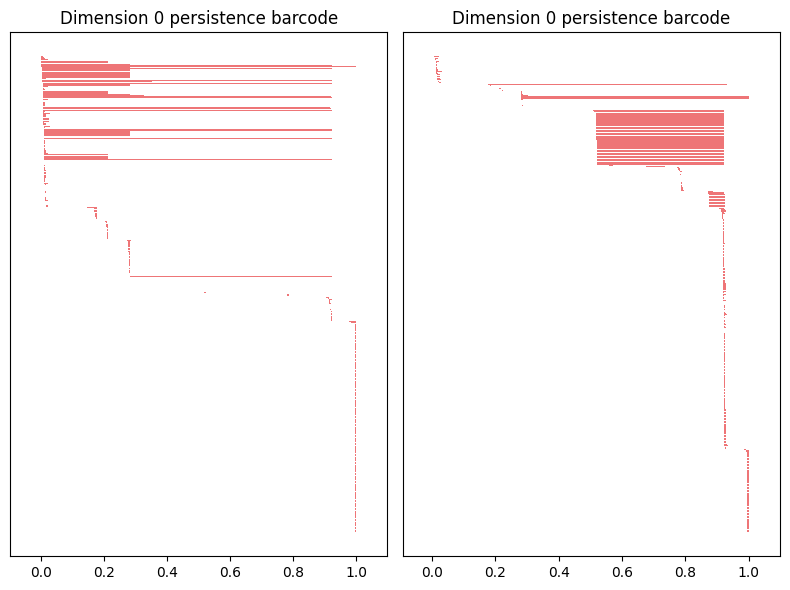

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

gd.plot_persistence_barcode(persistence_0, axes=axes[0])
axes[0].set_title(f'Dimension 0 persistence barcode')

gd.plot_persistence_barcode(persistence_1, axes=axes[1])
axes[1].set_title(f'Dimension 0 persistence barcode')

plt.tight_layout()
plt.show()

In [ ]:
persistence_0_no_inf = np.array([bars for bars in persistence_0 if bars[1]!= np.inf])
persistence_1_no_inf = np.array([bars for bars in persistence_1 if bars[1]!= np.inf])

In [ ]:
# Total persistence
tp_0 = np.sum(np.fromiter( (interval[1] - interval[0] for interval in persistence_0_no_inf), dtype=np.dtype(np.float64)))
tp_1 = np.sum(np.fromiter( (interval[1] - interval[0] for interval in persistence_1_no_inf), dtype=np.dtype(np.float64)))

# Average lifetime
al_0 = tp_0 / len(persistence_0_no_inf)
al_1 = tp_1 / len(persistence_1_no_inf)

# Standard deviation
sd_0 = np.std([(start + end) / 2 for start, end in persistence_0_no_inf])
sd_1 = np.std([(start + end) / 2 for start, end in persistence_1_no_inf])

print(f'DIM. 0:\n\tTotal persistence: {tp_0}\n\tAverage lifetime: {al_0}\n\tStandard deviation: {sd_0}')
print(f'DIM. 1:\n\tTotal persistence: {tp_1}\n\tAverage lifetime: {al_1}\n\tStandard deviation: {sd_1}')

DIM. 0:
	Total persistence: 925.1951047058824
	Average lifetime: 0.060011357897508104
	Standard deviation: 0.43079184817340405
DIM. 1:
	Total persistence: 107.43329098039216
	Average lifetime: 0.061743270678386294
	Standard deviation: 0.2507468593088357


In [ ]:
PE = gd.representations.Entropy()
pe_0 = PE.fit_transform([persistence_0_no_inf])[0][0]
pe_1 = PE.fit_transform([persistence_1_no_inf])[0][0]

print(f'DIM. 0:\n\tPersistent entropy: {pe_0}')
print(f'DIM. 1:\n\tPersistent entropy: {pe_1}')

DIM. 0:
	Persistent entropy: 7.6263024030945505
DIM. 1:
	Persistent entropy: 5.8037778351788205


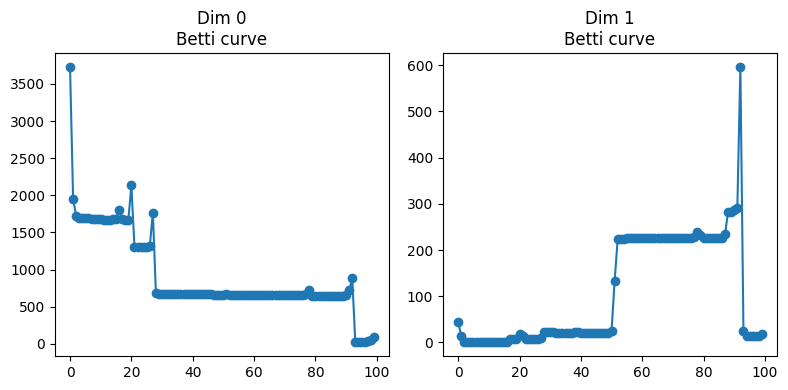

In [ ]:
bc = gd.representations.vector_methods.BettiCurve()

bc_0 = bc(persistence_0_no_inf)
bc_1 = bc(persistence_1_no_inf)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].plot(bc_0, marker='o')
axes[0].set_title(f'Dim 0\nBetti curve')

axes[1].plot(bc_1, marker='o')
axes[1].set_title(f'Dim 1\nBetti curve')

plt.tight_layout()
plt.show()


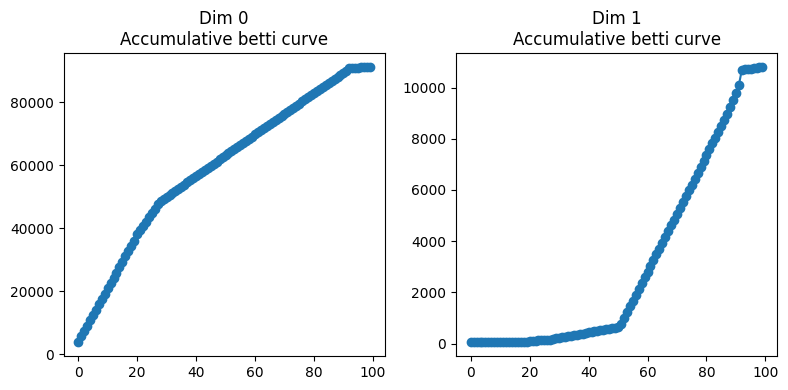

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].plot(bc_0.cumsum(0), marker='o')
axes[0].set_title(f'Dim 0\nAccumulative betti curve')

axes[1].plot(bc_1.cumsum(0), marker='o')
axes[1].set_title(f'Dim 1\nAccumulative betti curve')

plt.tight_layout()
plt.show()

In [ ]:
n_landscapes = 5
points_per_landscape = 50

lc = gd.representations.Landscape(num_landscapes=n_landscapes,resolution=points_per_landscape)

lc_0 = lc(persistence_0_no_inf)
lc_1 = lc(persistence_1_no_inf)

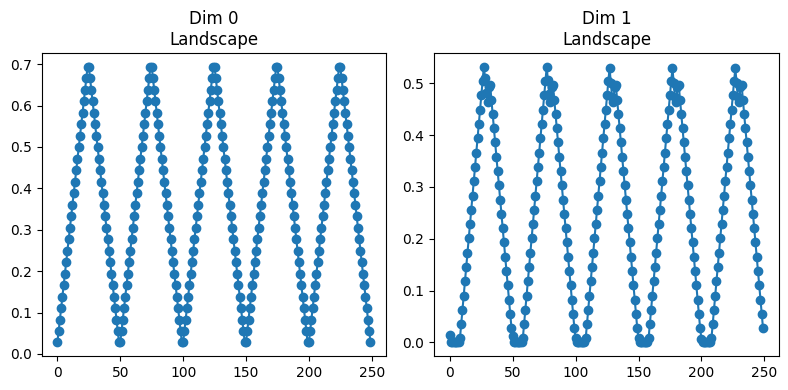

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].plot(lc_0, marker='o')
axes[0].set_title(f'Dim 0\nLandscape')

axes[1].plot(lc_1, marker='o')
axes[1].set_title(f'Dim 1\nLandscape')

plt.tight_layout()
plt.show()

In [ ]:
area_under_lc_0 = np.zeros(n_landscapes)
reshaped_landscapes_0 = lc_0.reshape(n_landscapes,points_per_landscape)
for i in range(n_landscapes):
    area_under_lc_0[i] = np.trapz(reshaped_landscapes_0[i], dx=1)

area_under_lc_1 = np.zeros(n_landscapes)
reshaped_landscapes_1 = lc_1.reshape(n_landscapes,points_per_landscape)
for i in range(n_landscapes):
    area_under_lc_1[i] = np.trapz(reshaped_landscapes_1[i], dx=1)

# show values
np.set_printoptions(precision=3)

print(f'DIM 0:\n\tArea under each landscape: {area_under_lc_0}')
print(f'DIM 1:\n\tArea under each landscape: {area_under_lc_1}')

DIM 0:
	Area under each landscape: [17.997 17.997 17.997 17.997 17.997]
DIM 1:
	Area under each landscape: [12.048 12.041 12.027 12.026 12.026]


In [ ]:
s = gd.representations.Silhouette()

resolution=100
p = 2
s2 = gd.representations.Silhouette(weight = lambda x: np.power(x[1]-x[0], p), resolution=resolution)

s_0 = s(persistence_0_no_inf)
s_1 = s(persistence_1_no_inf)
s2_0 = s2(persistence_0_no_inf)
s2_1 = s2(persistence_1_no_inf)

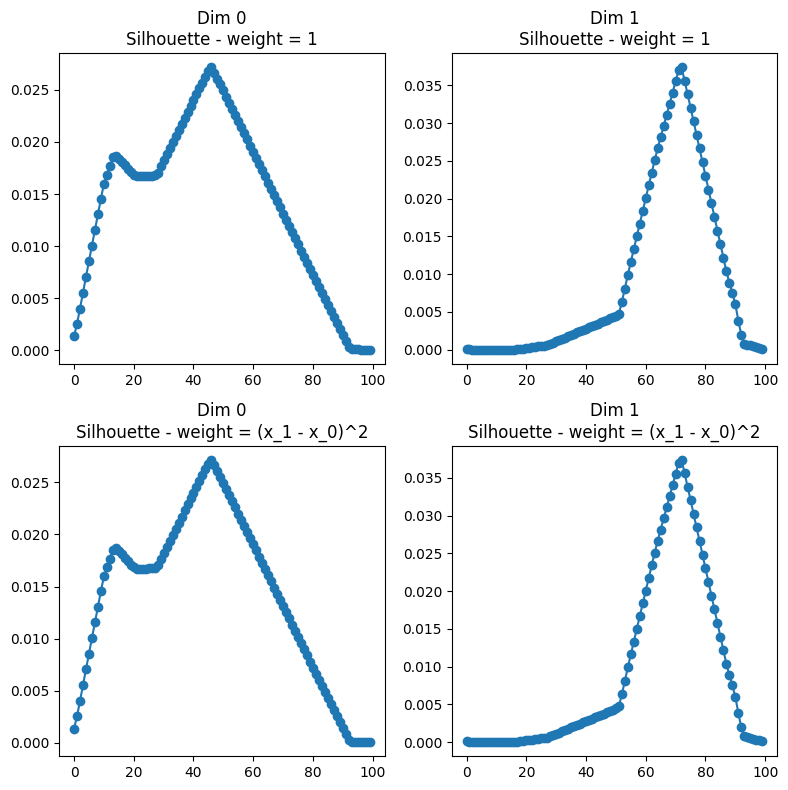

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axes[0, 0].plot(s_0, marker='o')
axes[0, 0].set_title(f'Dim 0\nSilhouette - weight = 1')

axes[0, 1].plot(s_1, marker='o')
axes[0, 1].set_title(f'Dim 1\nSilhouette - weight = 1')

axes[1, 0].plot(s_0, marker='o')
axes[1, 0].set_title(f'Dim 0\nSilhouette - weight = (x_1 - x_0)^2')

axes[1, 1].plot(s_1, marker='o')
axes[1, 1].set_title(f'Dim 1\nSilhouette - weight = (x_1 - x_0)^2')

plt.tight_layout()
plt.show()

In [ ]:
area_under_s_0 = np.trapz(s_0, dx=1)
area_under_s2_0 = np.trapz(s2_0, dx=1)
area_under_s_1 = np.trapz(s_1, dx=1)
area_under_s2_1 = np.trapz(s2_1, dx=1)

print(f'DIM 0:\n\tArea under silhouette - weight = 1: {area_under_s_0}\n\tArea under silhouette - weight = (x_1 - x_0)^2: {area_under_s2_0}')
print(f'DIM 1:\n\tArea under silhouette - weight = 1: {area_under_s_1}\n\tArea under silhouette - weight = (x_1 - x_0)^2: {area_under_s2_1}')

DIM 0:
	Area under silhouette - weight = 1: 1.4296239923432343
	Area under silhouette - weight = (x_1 - x_0)^2: 26.99891729743222
DIM 1:
	Area under silhouette - weight = 1: 0.9263856197202128
	Area under silhouette - weight = (x_1 - x_0)^2: 9.090720823961153


In [ ]:
%matplotlib inline

def compute_TDA(grayscale_image, display_results = False):
    flat_grayscale_image = grayscale_image.flatten()
    # Create CubicalComplex
    cc = gd.CubicalComplex(dimensions=grayscale_image.shape, top_dimensional_cells=flat_grayscale_image)

    # Persistence
    persistence = cc.persistence()

    persistence_0 = cc.persistence_intervals_in_dimension(0)  # intervals de persistencia de dimensio 0
    persistence_1 = cc.persistence_intervals_in_dimension(1)  # intervals de persistencia de dimensio 1

    persistence_0_no_inf = np.array([bars for bars in persistence_0 if bars[1] != np.inf])
    persistence_1_no_inf = np.array([bars for bars in persistence_1 if bars[1] != np.inf])

    ####### Descriptors #######
    # Total persistence
    tp_0 = np.sum(
        np.fromiter((interval[1] - interval[0] for interval in persistence_0_no_inf), dtype=np.dtype(np.float64)))
    tp_1 = np.sum(
        np.fromiter((interval[1] - interval[0] for interval in persistence_1_no_inf), dtype=np.dtype(np.float64)))

    # Average lifetime
    al_0 = 0
    al_1 = 0

    # Standard deviation
    sd_0 = 0
    sd_1 = 0

    # Persistent entropy
    PE = gd.representations.Entropy()
    pe_0 = 0
    pe_1 = 0

    # Betti numbers
    bc = gd.representations.vector_methods.BettiCurve()
    bc_0 = np.zeros(100)
    bc_1 = np.zeros(100)

    # Landscapes
    num_landscapes = 10
    points_per_landscape = 100
    lc = gd.representations.Landscape(num_landscapes=num_landscapes, resolution=points_per_landscape)
    lc_0 = np.zeros(100)
    lc_1 = np.zeros(100)
    area_under_lc_0 = np.zeros(num_landscapes)
    area_under_lc_1 = np.zeros(num_landscapes)

    # Silhouettes
    p = 2
    resolution = 100
    s = gd.representations.Silhouette()
    s2 = gd.representations.Silhouette(weight=lambda x: np.power(x[1] - x[0], p), resolution=resolution)
    s_0 = np.zeros(100)
    s_1 = np.zeros(100)
    s2_0 = np.zeros(100)
    s2_1 = np.zeros(100)
    area_under_s_0 = 0
    area_under_s_1 = 0
    area_under_s2_0 = 0
    area_under_s2_1 = 0

    # compute
    if (persistence_0_no_inf.size > 0):
        al_0 = tp_0 / len(persistence_0_no_inf)
        sd_0 = np.std([(start + end) / 2 for start, end in persistence_0_no_inf])
        pe_0 = PE.fit_transform([persistence_0_no_inf])[0][0]
        bc_0 = bc(persistence_0_no_inf)
        lc_0 = lc(persistence_0_no_inf)
        reshaped_landscapes_0 = lc_0.reshape(num_landscapes,points_per_landscape)
        for i in range(num_landscapes):
            area_under_lc_0[i] = np.trapz(reshaped_landscapes_0[i], dx=1)
        s_0 = s(persistence_0_no_inf)
        s2_0 = s2(persistence_0_no_inf)
        area_under_s_0 = np.trapz(s_0, dx=1)
        area_under_s2_0 = np.trapz(s2_0, dx=1)

    if (persistence_1_no_inf.size > 0):
        al_1 = tp_1 / len(persistence_1_no_inf)
        sd_1 = np.std([(start + end) / 2 for start, end in persistence_1_no_inf])
        pe_1 = PE.fit_transform([persistence_1_no_inf])[0][0]
        bc_1 = bc(persistence_1_no_inf)
        lc_1 = lc(persistence_1_no_inf)
        reshaped_landscapes_1 = lc_1.reshape(num_landscapes, points_per_landscape)
        for i in range(num_landscapes):
            area_under_lc_1[i] = np.trapz(reshaped_landscapes_1[i], dx=1)
        s_1 = s(persistence_1_no_inf)
        s2_1 = s2(persistence_1_no_inf)
        area_under_s_1 = np.trapz(s_1, dx=1)
        area_under_s2_1 = np.trapz(s2_1, dx=1)

    if(display_results):
        # Very fancy print
        fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 40))

        axes[0, 0].imshow(grayscale_image, cmap='gray')
        axes[0, 0].set_title('Image')

        gd.plot_persistence_diagram(persistence, legend=True, axes=axes[0, 1])
        axes[0, 1].set_title('Persistence diagram')

        gd.plot_persistence_barcode(persistence_0, axes=axes[1,0])
        axes[1, 0].set_title('Persistence barcode 0')

        gd.plot_persistence_barcode(persistence_1, axes=axes[1,1])
        axes[1, 1].set_title('Persistence barcode 1')

        axes[2, 0].plot(bc_0, marker='o')
        axes[2, 0].set_title('Betti numbers 0 ')

        axes[2, 1].plot(bc_1, marker='o')
        axes[2, 1].set_title('Betti numbers 1')

        axes[3, 0].plot(bc_0.cumsum(0), marker='o')
        axes[3, 0].set_title('Betti numbers 0 (cum sum)')

        axes[3, 1].plot(bc_1.cumsum(0), marker='o')
        axes[3, 1].set_title('Betti numbers 1 (cum sum)')

        axes[4, 0].plot(lc_0, marker='o')
        axes[4, 0].set_title('Landscape 0')

        axes[4, 1].plot(lc_1, marker='o')
        axes[4, 1].set_title('Landscape 1')

        axes[5, 0].plot(s_0, marker='o')
        axes[5, 0].set_title('Silhouette 0 - default')

        axes[5, 1].plot(s_1, marker='o')
        axes[5, 1].set_title('Silhouette 1 - default')

        axes[6, 0].plot(s2_0, marker='o')
        axes[6, 0].set_title('Silhouette 0 - quadratic')

        axes[6, 1].plot(s2_1, marker='o')
        axes[6, 1].set_title('Silhouette 1 - quadratic')

        plt.tight_layout()
        plt.show()

    return {'pt': [tp_0, tp_1], 'al': [al_0, al_1], 'sd': [sd_0, sd_1], 'pe': [pe_0, pe_1],
                               'bn': [bc_0, bc_1], 'lc': [area_under_lc_0, area_under_lc_1],
                               's': [area_under_s_0, area_under_s_1], 's2': [area_under_s2_0, area_under_s2_1]}

In [ ]:
!git clone https://github.com/EstherRH00/TDA-Notebooks.git

Cloning into 'TDA-Notebooks'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 120 (delta 41), reused 47 (delta 18), pack-reused 42 (from 1)
Receiving objects: 100% (120/120), 49.10 MiB | 15.03 MiB/s, done.
Resolving deltas: 100% (56/56), done.
Updating files: 100% (11/11), done.


# 直方图分析

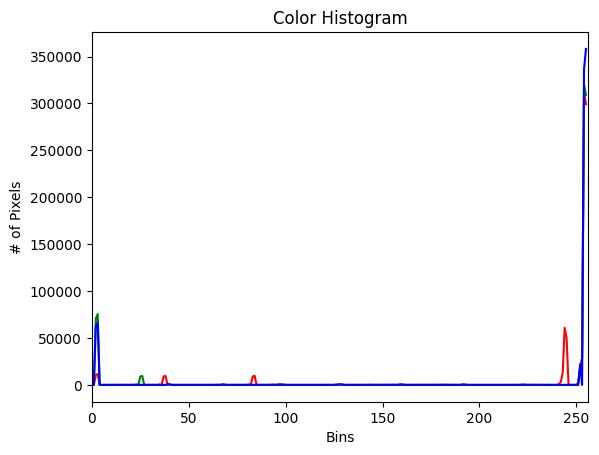

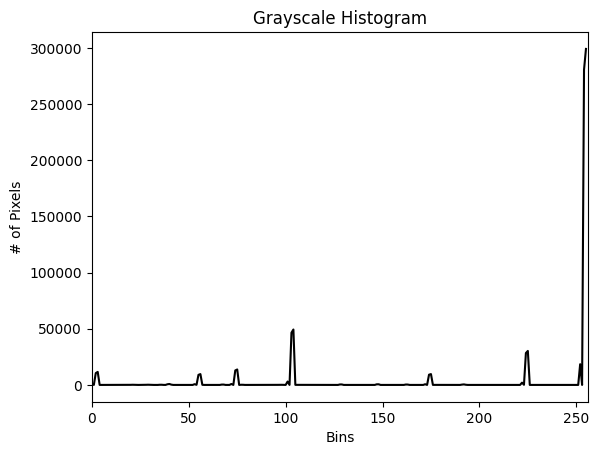

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
image = cv.imread('/content/01.png')

# 如果图像是彩色的，我们可能需要将其转换为RGB格式（因为OpenCV默认使用BGR）
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# 分离颜色通道
channels = cv.split(image_rgb)
colors = ('r', 'g', 'b')

# 创建一个图形窗口
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 循环遍历每一个颜色通道，并绘制直方图
for (channel, color) in zip(channels, colors):
    # 计算每个颜色通道的直方图
    hist = cv.calcHist([channel], [0], None, [256], [0, 256])

    # 绘制直方图
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

# 显示直方图
plt.show()

# 对于灰度图像，我们可以直接计算其直方图
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
hist_gray = cv.calcHist([gray_image], [0], None, [256], [0, 256])

# 绘制灰度直方图
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_gray, color='k')
plt.xlim([0, 256])
plt.show()